## Hierarchical Clustering on Country Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1: Loading the Dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/countries of the world.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Step 2: Data Preprocessing and Cleaning

In [3]:
# Replace commas with dots and convert to numeric
columns_to_convert = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration',
                      'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)',
                      'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
                      'Agriculture', 'Industry', 'Service']

for col in columns_to_convert:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Handling missing values
data = data.fillna(data.mean())

<ipython-input-3-0693bfe479ec>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


### Step 3: Data Normalization

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalizing the data
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Applying StandardScaler for normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

# Convert normalized data back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)

### Step 4: Data Visualization

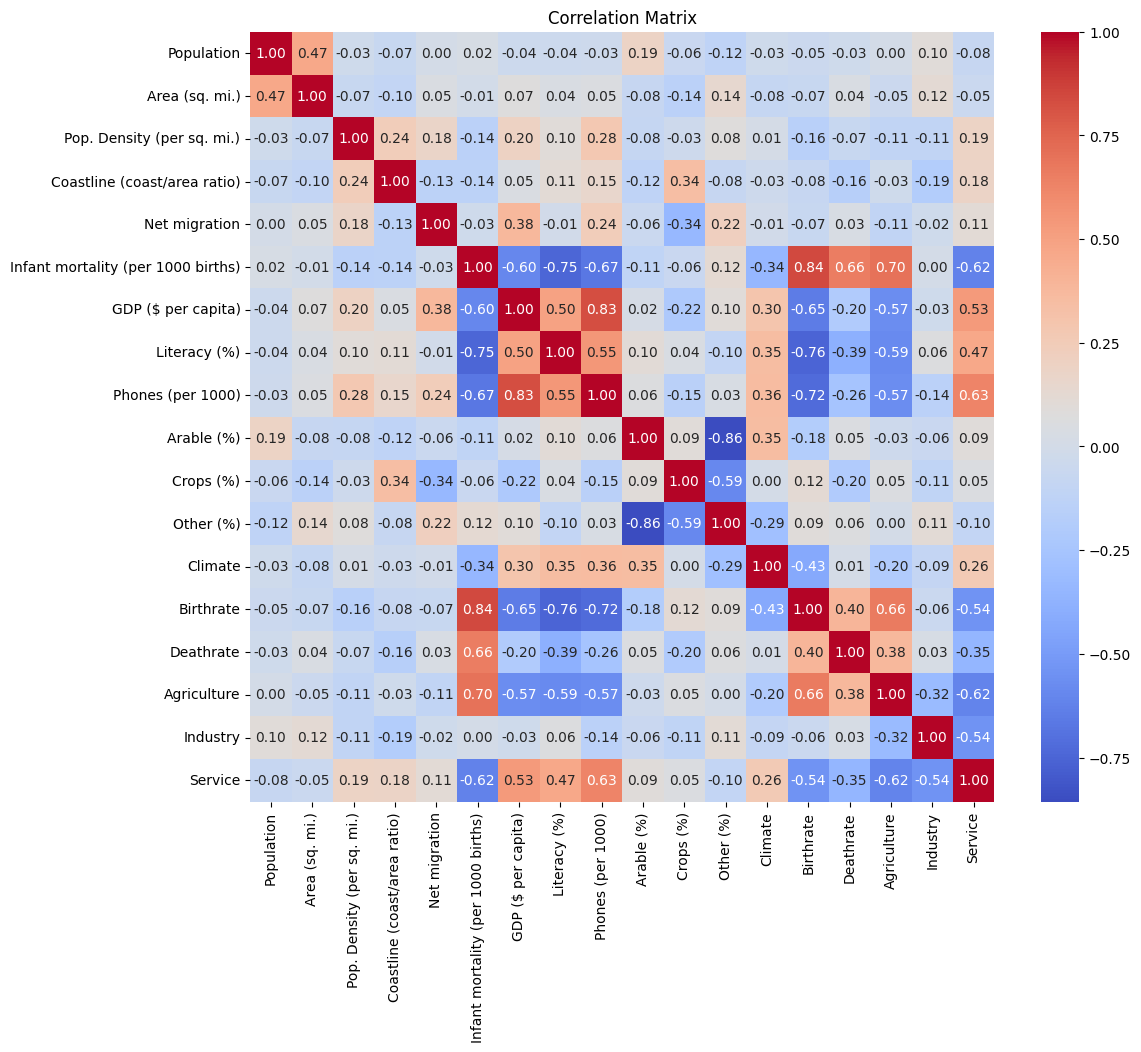

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a heatmap to see correlations between different features
plt.figure(figsize=(12, 10))
sns.heatmap(normalized_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Step 5: Hierarchical Clustering

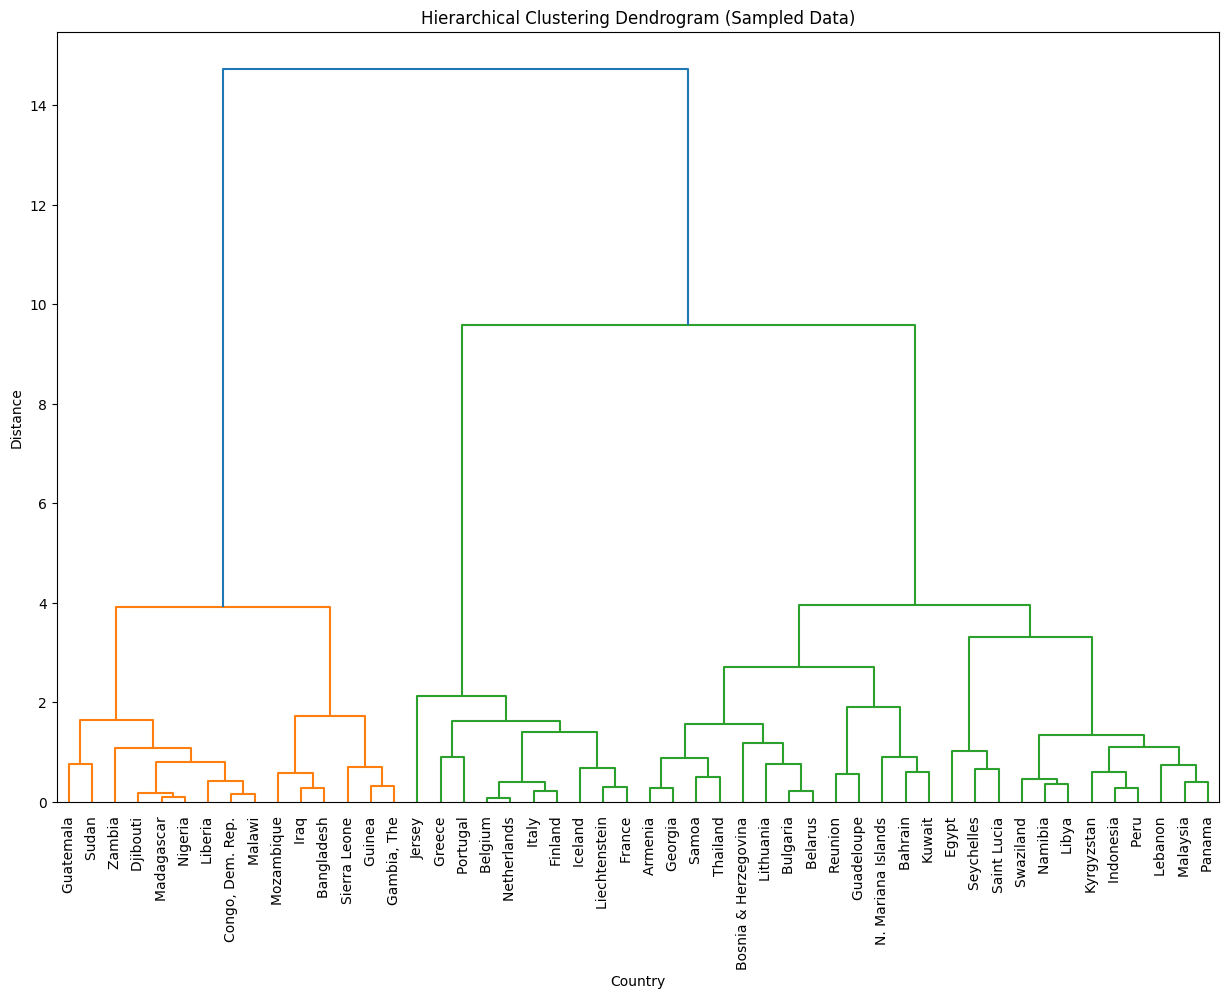

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Selecting a few features for clustering
clustering_features = ['GDP ($ per capita)', 'Phones (per 1000)', 'Birthrate', 'Literacy (%)']
subset_data_for_clustering = normalized_df[clustering_features].sample(n=50, random_state=42)

# Generating the linkage matrix
Z = linkage(subset_data_for_clustering, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=data['Country'].sample(n=50, random_state=42).values,
           leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

### Step 6: Clusters Extraction

In [7]:
from scipy.cluster.hierarchy import fcluster

threshold_distance = 10
clusters = fcluster(Z, threshold_distance, criterion='distance')

sampled_countries = data['Country'].sample(n=50, random_state=42).reset_index(drop=True)
clustered_data = pd.DataFrame({'Country': sampled_countries, 'Cluster': clusters})

clustered_data.sort_values(by='Cluster')

,Country,Cluster
49,Sierra Leone,1
27,Iraq,1
37,Nigeria,1
19,Guatemala,1
39,Malawi,1
20,Sudan,1
41,Mozambique,1
18,Guinea,1
8,"Congo, Dem. Rep.",1
22,Zambia,1


### Step 7: Visualization of Clusters

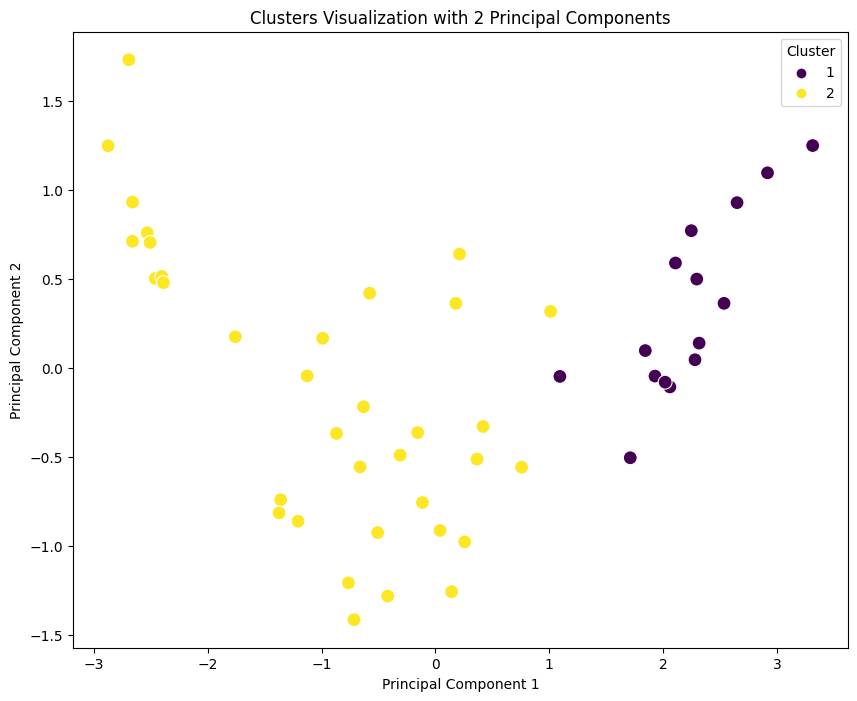

In [8]:
from sklearn.decomposition import PCA

# Applying PCA to reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
sampled_data_2d = pca.fit_transform(subset_data_for_clustering)

sampled_data_2d_df = pd.DataFrame(sampled_data_2d, columns=['PC1', 'PC2'])
sampled_data_2d_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=sampled_data_2d_df, palette='viridis', s=100)
plt.title('Clusters Visualization with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()